In [2]:
import numpy as np
from PIL import Image
import sys
from skimage import color
import matplotlib.pyplot as plt

In [3]:
try:  
    imgs = []
    for id in range(1,6):
        imgs.append(Image.open(f'./Training-Dataset/Images/1_P_hgr1_id0{id}_1.jpg')) 
except IOError: 
    print("Unexpected error:", sys.exc_info()[0])
    raise

In [4]:
def plot_RGB(img):
    R, G, B = 0, 1, 2
    img_RGB = np.array(img)
    fig, ax = plt.subplots(1, 4, figsize = (12, 20))
    ax[0].imshow(np.array(img))
    ax[1].imshow(img_RGB[:,:,R], cmap = plt.get_cmap('Greys'))
    ax[2].imshow(img_RGB[:,:,G], cmap = plt.get_cmap('Greys'))
    ax[3].imshow(img_RGB[:,:,B], cmap = plt.get_cmap('Greys'))
    plt.show()

In [5]:
def plot_YCbCr(img):
    Y, Cb, Cr = 0, 1, 2
    img_YCbCr = color.rgb2ycbcr(img)
    fig, ax = plt.subplots(1, 4, figsize = (12, 20))
    ax[0].imshow(np.array(img))
    ax[1].imshow(img_YCbCr[:,:,Y], cmap = plt.get_cmap('Greys'))
    ax[2].imshow(img_YCbCr[:,:,Cb], cmap = plt.get_cmap('Greys'))
    ax[3].imshow(img_YCbCr[:,:,Cr], cmap = plt.get_cmap('Greys'))
    plt.show()

In [6]:
def plot_HSV(img):
    H, S, V = 0, 1, 2
    img_HSV = color.rgb2hsv(img)
    fig, ax = plt.subplots(1, 4, figsize = (12, 20))
    ax[0].imshow(np.array(img))
    ax[1].imshow(img_HSL[:,:,H], cmap = plt.get_cmap('Greys'))
    ax[2].imshow(img_HSL[:,:,S], cmap = plt.get_cmap('Greys'))
    ax[3].imshow(img_HSL[:,:,V], cmap = plt.get_cmap('Greys'))

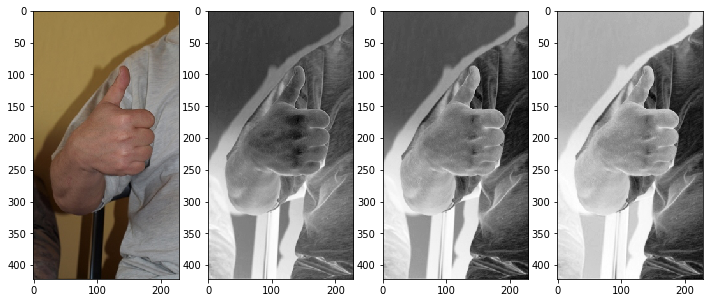

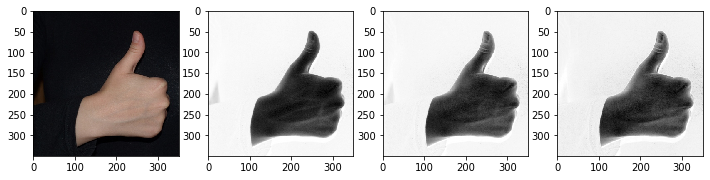

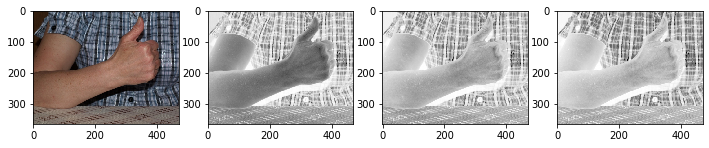

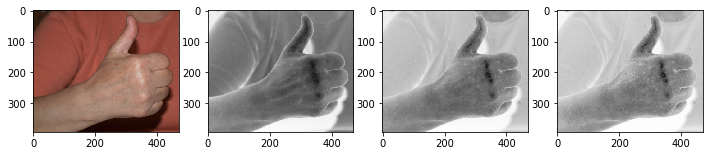

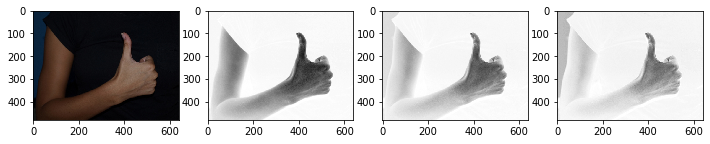

In [7]:
for img in imgs: plot_RGB(img)

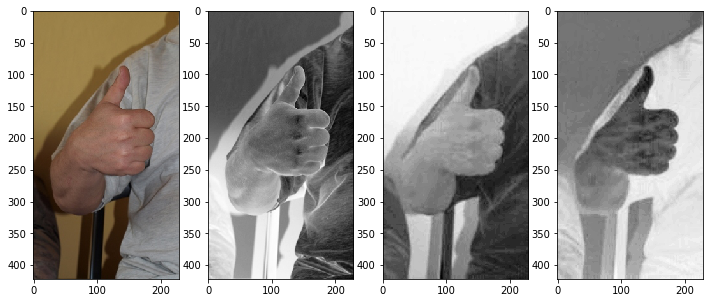

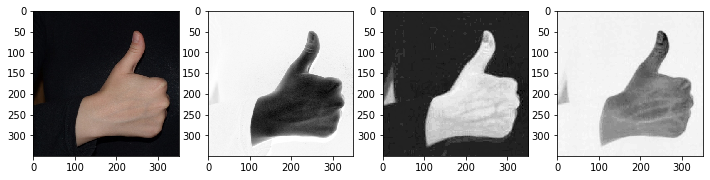

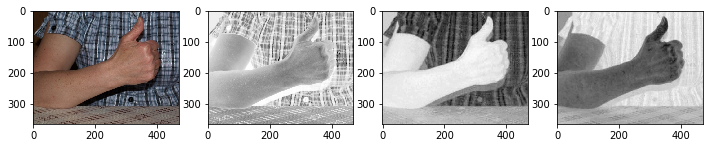

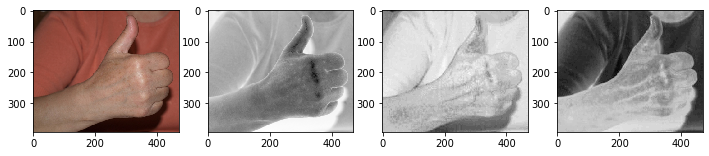

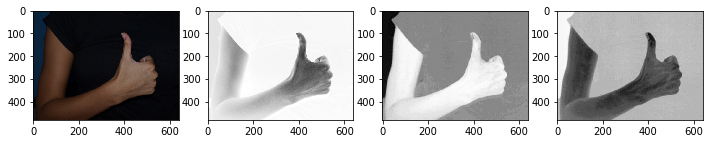

In [61]:
for img in imgs: plot_YCbCr(img)

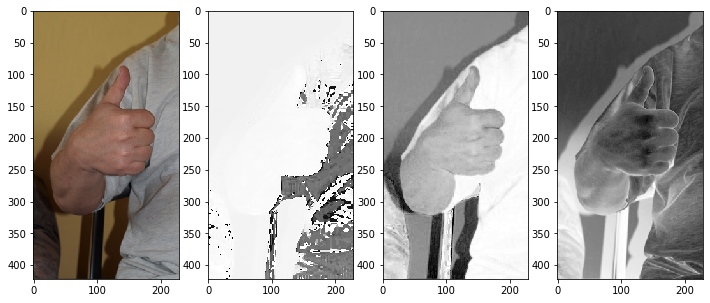

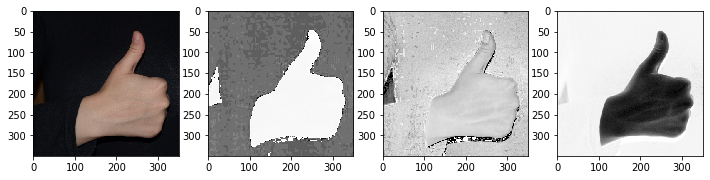

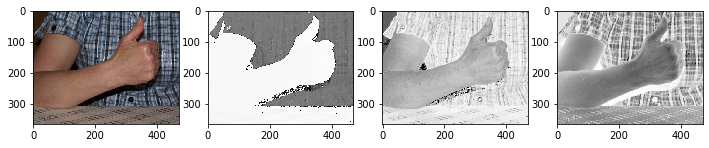

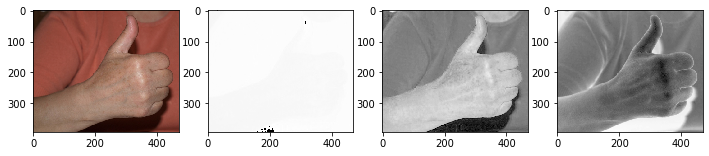

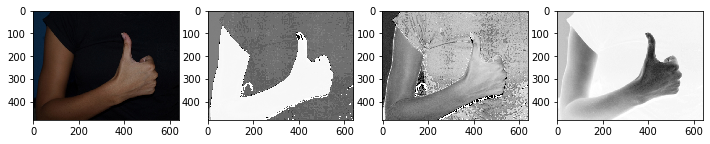

In [62]:
for img in imgs: plot_HSL(img)

In [8]:
# Read images
IMAGE = []
for shot in range(1,4):
    for person in range(1,6):
        for finger in range(1,6):
            try:
                IMAGE.append(np.array(Image.open(f'./Training-Dataset/Images/{finger}_P_hgr1_id0{person}_{shot}.jpg')))
                # print(f'Image shot #{shot} of person {person} showing {finger} is already in the database.')
            except IOError: 
                print(f'Image shot #{shot} of person {person} showing {finger} does not exist.')
                pass

Image shot #3 of person 2 showing 1 does not exist.
Image shot #3 of person 2 showing 2 does not exist.
Image shot #3 of person 2 showing 3 does not exist.
Image shot #3 of person 2 showing 4 does not exist.
Image shot #3 of person 2 showing 5 does not exist.
Image shot #3 of person 3 showing 1 does not exist.
Image shot #3 of person 3 showing 2 does not exist.
Image shot #3 of person 3 showing 3 does not exist.
Image shot #3 of person 3 showing 4 does not exist.
Image shot #3 of person 3 showing 5 does not exist.
Image shot #3 of person 4 showing 1 does not exist.
Image shot #3 of person 4 showing 2 does not exist.
Image shot #3 of person 4 showing 3 does not exist.
Image shot #3 of person 4 showing 4 does not exist.
Image shot #3 of person 4 showing 5 does not exist.


In [9]:
# Read masks
MASK = []
for shot in range(1,4):
    for person in range(1,6):
        for finger in range(1,6):
            try:
                MASK.append(np.array(Image.open(f'./Training-Dataset/Masks-Ideal/{finger}_P_hgr1_id0{person}_{shot}.bmp')))
                # print(f'Image shot #{shot} of person {person} showing {finger} is already in the database.')
            except IOError: 
                print(f'Image shot #{shot} of person {person} showing {finger} does not exist.')
                pass

Image shot #3 of person 2 showing 1 does not exist.
Image shot #3 of person 2 showing 2 does not exist.
Image shot #3 of person 2 showing 3 does not exist.
Image shot #3 of person 2 showing 4 does not exist.
Image shot #3 of person 2 showing 5 does not exist.
Image shot #3 of person 3 showing 1 does not exist.
Image shot #3 of person 3 showing 2 does not exist.
Image shot #3 of person 3 showing 3 does not exist.
Image shot #3 of person 3 showing 4 does not exist.
Image shot #3 of person 3 showing 5 does not exist.
Image shot #3 of person 4 showing 1 does not exist.
Image shot #3 of person 4 showing 2 does not exist.
Image shot #3 of person 4 showing 3 does not exist.
Image shot #3 of person 4 showing 4 does not exist.
Image shot #3 of person 4 showing 5 does not exist.


In [10]:
# MASK ORIGINALS
IMAGE_MASK = []
ONLY_IMAGE_MASK = []
for id in range(0, len(IMAGE)):
    masked_img = IMAGE[id].copy()
    masked_img[MASK[id] == True] = 0
    ONLY_IMAGE_MASK.append(color.rgb2ycbcr(masked_img)[MASK[id] != True])
    IMAGE_MASK.append(masked_img)

In [11]:
# EXTRACT CHROMA
CHROMA_R = CHROMA_B = np.array([])
for id in ONLY_IMAGE_MASK:
    CHROMA_R = np.hstack((CHROMA_R, id[:,1]))
    CHROMA_B = np.hstack((CHROMA_B, id[:,2]))

In [12]:
print(np.median(CHROMA_R))
print(np.median(CHROMA_B))

115.48827843137255
144.7296705882353


Chroma R median: 115.48827843137255
Chroma B median: 144.7296705882353


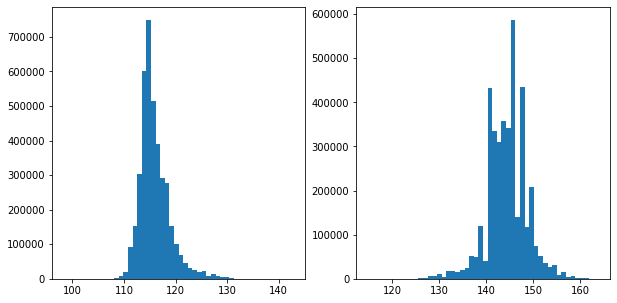

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].hist(CHROMA_R, bins = 50)
ax[1].hist(CHROMA_B, bins = 50)
print(f'Chroma R median: {np.median(CHROMA_R)}')
print(f'Chroma B median: {np.median(CHROMA_B)}')
plt.show()

In [75]:
LOWER_THRESHOLD_R = np.percentile(CHROMA_R, 5)
UPPER_THRESHOLD_R = np.percentile(CHROMA_R, 95)
print(f'[{LOWER_THRESHOLD_R},{UPPER_THRESHOLD_R}]')

LOWER_THRESHOLD_B = np.percentile(CHROMA_B, 5)
UPPER_THRESHOLD_B = np.percentile(CHROMA_B, 95)
print(f'[{LOWER_THRESHOLD_B},{UPPER_THRESHOLD_B}]')

[112.12277647058824,121.21990196078431]
[137.4271607843137,150.7358352941177]


In [122]:
VALID_SET = []
for shot in range(1,4):
    for person in range(6,9):
        for finger in range(1,6):
            try:
                VALID_SET.append(np.array(Image.open(f'./Validation-Dataset/Images/{finger}_P_hgr1_id0{person}_{shot}.jpg')))
                # print(f'Image shot #{shot} of person {person} showing {finger} is already in the database.')
            except IOError: 
                print(f'Image shot #{shot} of person {person} showing {finger} does not exist.')
                pass

# Read masks
VALID_MASK = []
for shot in range(1,4):
    for person in range(6,9):
        for finger in range(1,6):
            try:
                VALID_MASK.append(np.array(Image.open(f'./Validation-Dataset/Masks-Ideal/{finger}_P_hgr1_id0{person}_{shot}.bmp')))
                # print(f'Image shot #{shot} of person {person} showing {finger} is already in the database.')
            except IOError: 
                print(f'Image shot #{shot} of person {person} showing {finger} does not exist.')
                pass      
len(VALID_MASK)         

45

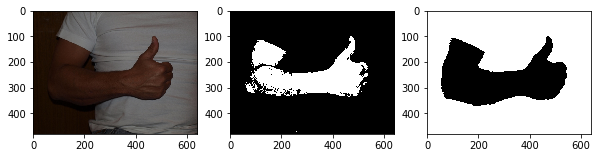

In [16]:
index = 30
new_mask = np.zeros(shape=color.rgb2ycbcr(VALID_SET[index]).shape)
test = color.rgb2ycbcr(VALID_SET[index])
new_mask[(test[:,:,1] > LOWER_THRESHOLD_R) & 
(test[:,:,1] < UPPER_THRESHOLD_R) & 
(test[:,:,2] > LOWER_THRESHOLD_B) &
(test[:,:,2] < UPPER_THRESHOLD_B)] = 1

fig, ax = plt.subplots(1, 3, figsize = (10,5))
ax[0].imshow(VALID_SET[index])
ax[1].imshow(new_mask)
ax[2].imshow(VALID_MASK[index], cmap = plt.get_cmap('gray'))
plt.show()

In [17]:
np.invert(VALID_MASK[index])

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

TOTAL: 307200
ERROR: 24684.0


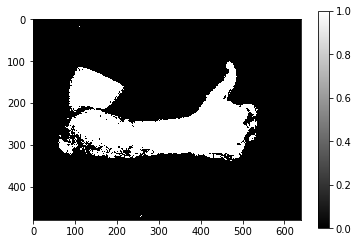

In [18]:
TOTAL = VALID_MASK[index].shape[0]*VALID_MASK[index].shape[1]
ERROR = np.abs(np.sum(np.invert(VALID_MASK[index]) - color.rgb2gray(new_mask)))

print(f'TOTAL: {TOTAL}')
print(f'ERROR: {ERROR}')
(TOTAL - ERROR) / TOTAL

plt.imshow(np.invert(VALID_MASK[index]) - (np.invert(VALID_MASK[index]) - color.rgb2gray(new_mask)), cmap=plt.get_cmap('gray'))
plt.colorbar()

(480, 640)
(5, 5)


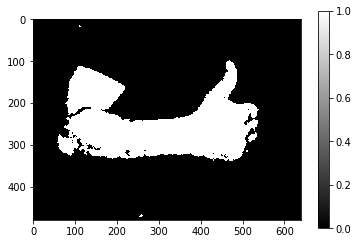

In [19]:
from skimage.morphology import selem, erosion, dilation, opening, closing, white_tophat, reconstruction
from scipy   import ndimage
structuring_elem = selem.disk(2)

print(color.rgb2gray(new_mask).shape)
print(structuring_elem.shape)
plt.imshow(dilation(color.rgb2gray(new_mask), structuring_elem), cmap=plt.get_cmap('gray'))
plt.colorbar()

In [74]:
def mask_hand (img, plot = False, dilate = False, size = 2):
    new_mask = np.zeros(shape=color.rgb2ycbcr(img).shape)
    img_transformed = color.rgb2ycbcr(img)
    new_mask[(img_transformed[:,:,1] > LOWER_THRESHOLD_R) & 
    (img_transformed[:,:,1] < UPPER_THRESHOLD_R) & 
    (img_transformed[:,:,2] > LOWER_THRESHOLD_B) &
    (img_transformed[:,:,2] < UPPER_THRESHOLD_B)] = 1

    
    if dilate:
        structuring_elem = selem.disk(size)
        new_mask_dilated = dilation(color.rgb2gray(new_mask), structuring_elem)
        if plot: 
            fig, ax = plt.subplots(1, 3, figsize = (10,5))
            ax[0].imshow(img)
            ax[1].imshow(new_mask)
            ax[2].imshow(new_mask_dilated, cmap = plt.get_cmap('gray'))
            plt.show()

        return color.rgb2gray(new_mask_dilated)

    if plot:
        fig, ax = plt.subplots(1, 2, figsize = (10,5))
        ax[0].imshow(img)
        ax[1].imshow(new_mask)
        plt.show()   
    
    return color.rgb2gray(new_mask)

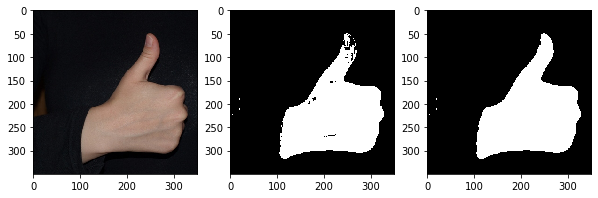

In [71]:
_ = mask_hand(IMAGE[5], plot = True, dilate = True, size = 5)

In [6]:
def assess (prediction, truth):
    prediction = np.array(prediction, dtype=bool)
    truth = np.invert(truth)
    TOTAL = np.zeros(shape=(truth.shape[0],truth.shape[1]))

    TP = TOTAL.copy()
    TN = TOTAL.copy()
    FP = TOTAL.copy()
    FN = TOTAL.copy()

    # True Positive = intersection of truth and prediction
    TP[np.logical_and(prediction, truth)] = 1 
    # False Positive = intersection of true background and prediction, where true background = inverse truth
    FP[np.logical_and(prediction, np.invert(truth))] = 1
    # False Negative = intersection of truth and prediction background
    FN[np.logical_and(np.invert(prediction), truth)] = 1
    # True Negative = intersection of true background and prediction background
    TN[np.logical_and(np.invert(prediction), np.invert(truth))] = 1

    #plt.imshow(TN, cmap=plt.get_cmap('gray'))
    #plt.show()
    #plt.colorbar()

    accuracy = (np.sum(np.abs(TP)) + np.sum(np.abs(TN))) / (np.sum(np.abs(TP)) + np.sum(np.abs(TN)) + np.sum(np.abs(FP)) + np.sum(np.abs(FN)))
    precision = (np.sum(np.abs(TP))) / (np.sum(np.abs(TP)) + np.sum(np.abs(FP)))
    recall = (np.sum(np.abs(TP))) / (np.sum(np.abs(TP)) + np.sum(np.abs(FN)))
    F1score = (np.sum(np.abs(TP)) * 2) / (2 * np.sum(np.abs(TP)) + np.sum(np.abs(FP)) + np.sum(np.abs(FN)))

    print(f'Accuracy: {np.round(accuracy * 100, 2)}')
    print(f'Precision: {np.round(precision * 100, 2)}')
    print(f'Recall: {np.round(recall * 100, 2)}')
    print(f'F1-Score: {np.round(F1score * 100, 2)}')

assess(color.rgb2gray(new_mask), VALID_MASK[index])

NameError: name 'new_mask' is not defined

In [78]:
assess(mask_hand(VALID_SET[index], plot = False, dilate = True, size = 5), VALID_MASK[index])

Accuracy: 95.59
Precision: 97.36
Recall: 84.85
F1-Score: 90.67


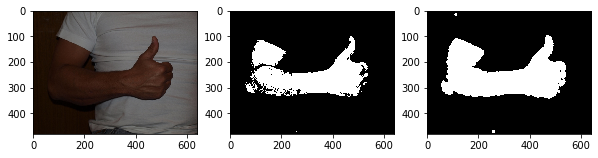

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
mask_hand(VALID_SET[index], plot = True, dilate = True, size = 5)

In [21]:
class SkinDetector:

    def __init__(self, hist_range = (1, 99), dilate = 0):
        self.load_data('./Training-Dataset', './Validation-Dataset')
        self.lower_percentile = hist_range[0]
        self.upper_percentile = hist_range[1]
        if dilate > 0:
            self.dilate = True
            self.dilation_size = dilate
        else:
            self.dilate = False

    def load_data(self, TR_path, VD_path):
        self.TR_DATA = []
        self.VD_DATA = []

        self.TR_MASK = []
        self.VD_MASK = []

        self.TR_LABEL = []
        self.VD_LABEL = []

        for shot in range(1,4): 
            for person in range(1,9): 
                for finger in range(1,6):
                    try:
                        self.TR_DATA.append(np.array(Image.open(
                            f'{TR_path}/Images/{finger}_P_hgr1_id0{person}_{shot}.jpg')))
                        self.TR_LABEL.append(finger)
                    except IOError: pass
                    try:
                        self.TR_MASK.append(np.array(Image.open(
                            f'{TR_path}/Masks-Ideal/{finger}_P_hgr1_id0{person}_{shot}.bmp')))
                    except IOError: pass
                    try:
                        self.VD_DATA.append(np.array(Image.open(
                            f'{VD_path}/Images/{finger}_P_hgr1_id0{person}_{shot}.jpg')))     
                        self.VD_LABEL.append(finger)
                    except IOError: pass
                    try:
                        self.VD_MASK.append(np.array(Image.open(
                            f'{VD_path}/Masks-Ideal/{finger}_P_hgr1_id0{person}_{shot}.bmp')))
                    except IOError: pass
    
    def train(self):
        ONLY_IMAGE_MASK = []
        for id in range(0, len(self.TR_DATA)):
            masked_img = self.TR_DATA[id].copy()
            masked_img[self.TR_MASK[id] == True] = 0
            ONLY_IMAGE_MASK.append(color.rgb2ycbcr(masked_img)[self.TR_MASK[id] != True])

        # EXTRACT CHROMA
        CHROMA_R = CHROMA_B = np.array([])
        for id in ONLY_IMAGE_MASK:
            CHROMA_R = np.hstack((CHROMA_R, id[:,1]))
            CHROMA_B = np.hstack((CHROMA_B, id[:,2]))
        
        self.LOWER_THRESHOLD_R = np.percentile(CHROMA_R, self.lower_percentile)
        self.MEDIAN_R = np.percentile(CHROMA_R, 50)
        self.UPPER_THRESHOLD_R = np.percentile(CHROMA_R, self.upper_percentile)

        self.LOWER_THRESHOLD_B = np.percentile(CHROMA_B, self.lower_percentile)
        self.MEDIAN_B = np.percentile(CHROMA_B, 50)
        self.UPPER_THRESHOLD_B = np.percentile(CHROMA_B, self.upper_percentile)

    def segment (self, img, plot = False):
        new_mask = np.zeros(shape = color.rgb2ycbcr(img).shape)
        img_transformed = color.rgb2ycbcr(img)
        new_mask[(img_transformed[:,:,1] > self.LOWER_THRESHOLD_R) & (img_transformed[:,:,1] < self.UPPER_THRESHOLD_R) & (img_transformed[:,:,2] > self.LOWER_THRESHOLD_B) &(img_transformed[:,:,2] < self.UPPER_THRESHOLD_B)] = 1

        
        if self.dilate:
            structuring_elem = selem.disk(self.dilation_size)
            new_mask_dilated = dilation(color.rgb2gray(new_mask), structuring_elem)
            if plot: 
                fig, ax = plt.subplots(1, 3, figsize = (10,5))
                ax[0].imshow(img)
                ax[1].imshow(new_mask)
                ax[2].imshow(new_mask_dilated, cmap = plt.get_cmap('gray'))
                plt.show()

            return color.rgb2gray(new_mask_dilated)

        if plot:
            fig, ax = plt.subplots(1, 2, figsize = (10,5))
            ax[0].imshow(img)
            ax[1].imshow(new_mask)
            plt.show()   
        
        return color.rgb2gray(new_mask)
    
    def assess (prediction, truth):
        prediction = np.array(prediction, dtype=bool)
        truth = np.invert(truth)
        TOTAL = np.zeros(shape=(truth.shape[0],truth.shape[1]))

        TP = TOTAL.copy()
        TN = TOTAL.copy()
        FP = TOTAL.copy()
        FN = TOTAL.copy()

        # True Positive = intersection of truth and prediction
        TP[np.logical_and(prediction, truth)] = 1 
        # False Positive = intersection of true background and prediction, where true background = inverse truth
        FP[np.logical_and(prediction, np.invert(truth))] = 1
        # False Negative = intersection of truth and prediction background
        FN[np.logical_and(np.invert(prediction), truth)] = 1
        # True Negative = intersection of true background and prediction background
        TN[np.logical_and(np.invert(prediction), np.invert(truth))] = 1

        accuracy = (np.sum(np.abs(TP)) + np.sum(np.abs(TN))) / (np.sum(np.abs(TP)) + np.sum(np.abs(TN)) + np.sum(np.abs(FP)) + np.sum(np.abs(FN)))
        precision = (np.sum(np.abs(TP))) / (np.sum(np.abs(TP)) + np.sum(np.abs(FP)))
        recall = (np.sum(np.abs(TP))) / (np.sum(np.abs(TP)) + np.sum(np.abs(FN)))
        F1score = (np.sum(np.abs(TP)) * 2) / (2 * np.sum(np.abs(TP)) + np.sum(np.abs(FP)) + np.sum(np.abs(FN)))

        return (accuracy, precision, recall, F1score)

    def validate (prediction_set, truth_set):
        self.accuracy, self.prediction, self.recall, self.F1score = [], [], [], []
        for (prediction, truth) in zip(prediction_set, truth_set):
            metrics = self.assess(colot.rgb2gray(prediction), truth_set)
            self.accuracy.append(metrics[0])
            self.precision.append(metrics[1])
            self.recall.append(metrics[2])
            self.F1score.append(metrics[3])

    def segment_dataset(self, data):
        images = np.asarray(self.segment(data[0])).reshape(-1, 1)
        for img in data:
            if not np.array_equal(img, data[0]):
                images = np.hstack((images, self.segment(img).reshape(-1, 1)))
        
        return images


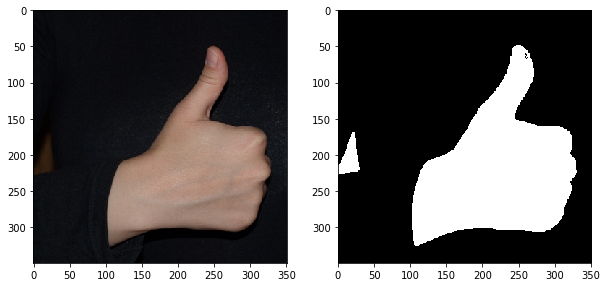

In [32]:
sd = SkinDetector()
sd.train()
_ = sd.segment(sd.TR_DATA[5], plot=True)

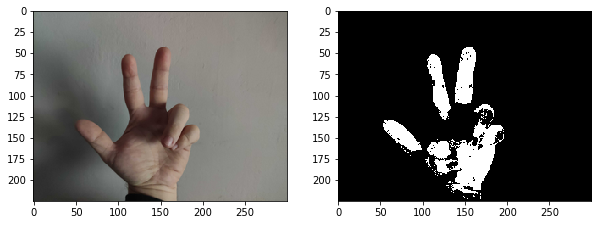

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
sd = SkinDetector(hist_range=(5,95))
sd.train()
basewidth = 300
img = Image.open(f'../../../../Desktop/mano7.jpg')
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
sd.segment(img, plot=True)

In [99]:
from sklearn import svm
from sklearn.svm import SVC

In [100]:
classifier = svm.SVC(kernel = 'poly', C = 1, degree = 2)

In [101]:
X = sd.segment_dataset(sd.TR_DATA)
print(len(X[0]))
X_train = np.asarray(X)
print(X_train.shape)
Y_train = np.asarray(sd.TR_LABEL)

#classifier.fit(X_train, Y_train)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 96638 and the array at index 1 has size 104594

In [ ]:
# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)